# **Qualité de l'air - Bretagne**

La pollution de l'air pose un risque sérieux dans le monde entier. Les villes sont étouffées par le smog et les émissions dangereuses, qui nuisent à la fois à l'environnement et à la santé des populations mondiales. La région Bretagne a donc besoin de différents outils pour suivre et analyser la pollution atmosphérique à l'échelle de la région. Elle vous demande de l'aide afin de constituer une analyse d'un jeu de données qu'elle possède.

Suite à la pandémie de COVID-19 qui a débuté au début de l'année 2020, la région souhaite connaître l'impact du confinement sur la pollution atmosphérique dans la région.

    Réaliser un Notebook qui importe les données.
    Mettre en forme et traiter les données en vue d'une cartographie.
    Interpréter les résultats (et pas juste leur affichage)


les données proviennent de la source ci dessous :

https://data.airbreizh.asso.fr/contenu/services_didon.html#

# I- Affichage des données

In [1]:
import requests
import pandas as pd
import seaborn as sns 
import io
from pathlib import Path
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from collections import defaultdict
from datetime import datetime as dt
from bs4 import BeautifulSoup as bs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
from IPython.core.display import HTML
from scipy import stats
# La ligne ci-dessous permet d'afficher les graphiques dans jupyterlab
%matplotlib inline


In [2]:
r = requests.get('https://data.airbreizh.asso.fr/geoserver/ind_bretagne_agglo/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ind_bretagne_agglo:ind_bretagne_agglo&outputFormat=csv')
data = pd.read_csv(io.StringIO(r.text), sep=",")
data.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5806,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5805,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5804,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5803,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5802,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


# II - Analyse des données brutes

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FID        2547 non-null   object
 1   date_ech   2547 non-null   object
 2   valeur     2547 non-null   int64 
 3   qualif     2547 non-null   object
 4   source     2547 non-null   object
 5   type_zone  2547 non-null   object
 6   code_zone  2547 non-null   int64 
 7   lib_zone   2547 non-null   object
 8   val_no2    2547 non-null   int64 
 9   val_so2    2547 non-null   int64 
 10  val_o3     2547 non-null   int64 
 11  val_pm10   2547 non-null   int64 
 12  val_pm25   2547 non-null   int64 
 13  geom       2547 non-null   object
 14  couleur    2547 non-null   object
dtypes: int64(7), object(8)
memory usage: 298.6+ KB
None


Le jeu de données est relativement complet, nous constatons qu'il n'y a pas de valeur manquante.
Nous allons maintenant, observer comment se compose le jeu de données.

### Afficher la liste des variables quantitatives dans le jeu de données

In [4]:

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['valeur', 'code_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10', 'val_pm25']


### Afficher la liste des noms des variables qualitatives

In [5]:
# Get list of categorical variables
variables = (data.dtypes == 'object')
object_cols = list(variables[variables].index)


print('There are {} categorical variables\n'.format(len(object_cols)))

print('The categorical variables are :', object_cols)

There are 8 categorical variables

The categorical variables are : ['FID', 'date_ech', 'qualif', 'source', 'type_zone', 'lib_zone', 'geom', 'couleur']


### Afficher le contenu de ces variables qualitatives

In [6]:
variables.describe(include=['object'])

count       15
unique       2
top       True
freq         8
dtype: object

In [7]:
for var in object_cols:
    print(f"{var} contains {len(data[var].unique())} labels")

FID contains 2547 labels
date_ech contains 367 labels
qualif contains 5 labels
source contains 1 labels
type_zone contains 1 labels
lib_zone contains 7 labels
geom contains 7 labels
couleur contains 7 labels


In [8]:
for var in object_cols:
    print(var)
    print("***********************************************")
    print(data[var].value_counts())
    print("==============================================")
    
#var le nom de la colonne quantitative
#data on lui donne le nom d'une colonne à chaque itération il va nous donner la valeur des occurences qui sont dans la colonne var

FID
***********************************************
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5214    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5601    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-52ed    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5661    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-52a7    1
                                                    ..
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5369    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-5304    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-525f    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-552f    1
ind_bretagne_agglo.fid-73954a3d_177d0f36a7a_-55c6    1
Name: FID, Length: 2547, dtype: int64
date_ech
***********************************************
2020-09-02T10:00:00    7
2020-08-01T10:00:00    7
2020-06-09T10:00:00    7
2020-03-06T10:00:00    7
2020-10-16T10:00:00    7
                      ..
2020-03-10T10:00:00    6
2020-01-28T10:00:00    6
2020-02-07T10:00:00    6
2020-02-25T10:00:00    

### Detail des informations

Notre jeu de données comporte **15 colonnes et 2547 lignes**. Il n'y a aucune donnée manquante:

    - 7 colonnes avec des variables numériques
    
    - 8 colonnes avec des variables qualitatives.
    
la période concernée pour notre étude est du **1ER JANVIER 2020 AU 1ER JANVIER 2021**.

Détail des colonnes composant notre dataset :(https://www.airbreizh.asso.fr/glossaire/)

 
 
 2   **valeur**  => Valeur de l'indice qualité de l'air, compris entre 1 et 10 ou nul si absent 
 
 3   **qualif**  => bon (3,4), moyen(5), médiocre(6,7), très bon(2), mauvais  
 
 4   **source** => "air breizh" toutes les données sont identiques , colonne non significative   
 
 5   **type_zone** => EPCI(Etablissement Public de Coopération Intercommunale) toutes les données sont identiques , colonne non significative
 
 6   **code_zone**  => code correspondant aux libelles zones (7 codes)
 
 7   **lib_zone** => 7 zones géographiques avec une donnée quotidienne pour la plupart des zones 
     - CA Quimper Bretagne Occidentale, 
     - CA Lorient, 
     - CA Saint-Brieuc Armor,  
     - CA Golfe du Morbihan - Vannes, 
     - CA du Pays de Saint-Malo (Saint-Malo Agglomération)    
     - Rennes Métropole,
     - Brest Métropole
 
     
 8   **val_no2** => NO2	Dioxyde d'azote (valeur comprise entre 1 et 10 ou nul si absente)
 
 9   **val_so2** => SO2 Dioxyde de soufre (valeur comprise entre 1 et 10 ou nul si absente)
 
 10  **val_o3** => O3	Ozone  (valeur comprise entre 1 et 10 ou nul si absente)
 
 11  **val_pm10** =>PM10	Particules de diamètre inférieur à 10 μm   
 
 12  **val_pm25** =>PM25  	Particules de diamètre inférieur à 2.5 μm  
 
 13  **geom** => donnnées géosidiques , nous devrons les transformer en lattitude et longitudes    
 
 14  **couleur**


### DONNEES CONCERNANT LES VARIABLES QUALITATIVES

In [9]:

from IPython.display import IFrame, display
filepath = "indices.PNG"
IFrame(filepath, width=900, height=400)

# III- Analyses

## 1 - Etude des corrélations

In [10]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
valeur,1.000000,0.018712,-0.046354,NaN,0.766629,0.623687,NaN
code_zone,0.018712,1.000000,0.075305,NaN,-0.022182,0.105371,NaN
val_no2,-0.046354,0.075305,1.000000,NaN,-0.085170,0.099260,NaN
val_so2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val_o3,0.766629,-0.022182,-0.085170,NaN,1.000000,0.274984,NaN
val_pm10,0.623687,0.105371,0.099260,NaN,0.274984,1.000000,NaN
val_pm25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

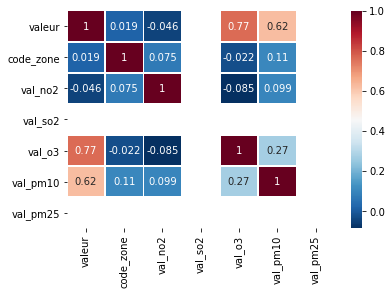

In [11]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Grâce à l'étude de correlation, nous constatons que :

    . Les données qui ont un impact sur la qualité de l'air(valeur) sont l'ozone(val_03) et les particules de diamètre inférieur à 10 μm ( val_pm10 ) 
    
    . Les données pour lesquelles nous ne pouvons faire aucune observation sont le Dioxyde de soufre(val_so2) et les particules de diamètre inférieur à 25 μm(val_pm25) car nous n'avons pas de données.
    
    . Le dioxyde d'azote (val_no2) n'a aucun impact sur la qualité de l'air

## 2- Sélection des données nécessaires

In [12]:
#suppression des colonnes inutiles 
data = data.drop(['FID', 'source', 'type_zone', 'val_so2', 'val_pm25'], axis=1)

### DONNEES GLOBALES  1ER JANVIER 2020 AU 1ER JANVIER 2021.

In [13]:
data

,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur
0,2021-01-01T10:00:00,3,Bon,200069409,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,2021-01-01T10:00:00,3,Bon,200067932,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,2021-01-01T10:00:00,3,Bon,200068120,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,2021-01-01T10:00:00,3,Bon,243500139,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,2021-01-01T10:00:00,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
...,...,...,...,...,...,...,...,...,...,...
2542,2020-01-01T10:00:00,3,Bon,200069409,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600
2543,2020-01-01T10:00:00,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600
2544,2020-01-01T10:00:00,3,Bon,200042174,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600
2545,2020-01-01T10:00:00,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600


## 1er confinement : 17 mars 2020 - 11 mai 2020

In [14]:

data
data['date_ech'] = pd.to_datetime(data['date_ech']).dt.date
start_date = pd.to_datetime("2020-3-17").date()
end_date = pd.to_datetime("2020-5-11").date()
mask = (data['date_ech'] > start_date) & (data['date_ech'] <= end_date)
df032020 = data.loc[mask]
df032020

,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur
1645,2020-05-11,4,Bon,243500139,Rennes Métropole,1,4,3,POINT (349555.0070453745 6789093.386528317),#C3F000
1646,2020-05-11,4,Bon,200067932,CA Golfe du Morbihan - Vannes,1,4,3,POINT (269961.1106939723 6746307.8992528645),#C3F000
1647,2020-05-11,4,Bon,200068120,CA Quimper Bretagne Occidentale,1,4,4,POINT (172753.63056731108 6795400.543816281),#C3F000
1648,2020-05-11,5,Moyen,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,5,POINT (338719.75810268405 6844013.788199687),#FFFF00
1649,2020-05-11,4,Bon,242900314,Brest Métropole,1,4,4,POINT (147878.22420658765 6837175.794037035),#C3F000
...,...,...,...,...,...,...,...,...,...,...
2023,2020-03-18,5,Moyen,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,4,5,POINT (338719.75810268405 6844013.788199687),#FFFF00
2024,2020-03-18,4,Bon,200067932,CA Golfe du Morbihan - Vannes,2,4,4,POINT (269961.1106939723 6746307.8992528645),#C3F000
2025,2020-03-18,5,Moyen,243500139,Rennes Métropole,2,4,5,POINT (349555.0070453745 6789093.386528317),#FFFF00
2026,2020-03-18,4,Bon,242900314,Brest Métropole,2,4,4,POINT (147878.22420658765 6837175.794037035),#C3F000


## 2eme confinement : 30 octobre 2020 - 15 décembre 2020

In [15]:
data
data['date_ech'] = pd.to_datetime(data['date_ech']).dt.date
start_date = pd.to_datetime("2020-10-30").date()
end_date = pd.to_datetime("2020-12-15").date()
mask = (data['date_ech'] > start_date) & (data['date_ech'] <= end_date)
df102020 = data.loc[mask]
df102020

,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur
119,2020-12-15,3,Bon,242900314,Brest Métropole,1,3,3,POINT (147878.22420658765 6837175.794037035),#99E600
120,2020-12-15,3,Bon,243500139,Rennes Métropole,3,2,2,POINT (349555.0070453745 6789093.386528317),#99E600
121,2020-12-15,3,Bon,200069409,CA Saint-Brieuc Armor,1,3,3,POINT (269153.2682993477 6832824.934141148),#99E600
122,2020-12-15,4,Bon,200042174,CA Lorient,1,4,3,POINT (229772.04043578357 6768639.926683848),#C3F000
123,2020-12-15,3,Bon,200067932,CA Golfe du Morbihan - Vannes,3,3,3,POINT (269961.1106939723 6746307.8992528645),#99E600
...,...,...,...,...,...,...,...,...,...,...
436,2020-10-31,3,Bon,200068120,CA Quimper Bretagne Occidentale,1,3,3,POINT (172753.63056731108 6795400.543816281),#99E600
437,2020-10-31,3,Bon,242900314,Brest Métropole,1,3,3,POINT (147878.22420658765 6837175.794037035),#99E600
438,2020-10-31,3,Bon,200067932,CA Golfe du Morbihan - Vannes,1,3,2,POINT (269961.1106939723 6746307.8992528645),#99E600
439,2020-10-31,3,Bon,200042174,CA Lorient,1,3,3,POINT (229772.04043578357 6768639.926683848),#99E600


## 3- Fréquence de la qualité de l'air (en valeur et en %) par ville 

### A - DONNEES GLOBALES

In [16]:
#fréquences selon la zone et la qualité de l'air
pd.crosstab(data['lib_zone'],data['qualif'],margins=True)

qualif,Bon,Mauvais,Moyen,Médiocre,Très bon,All
lib_zone,,,,,,
Brest Métropole,303,1,37,17,3,361
CA Golfe du Morbihan - Vannes,302,0,50,8,5,365
CA Lorient,302,0,53,7,3,365
CA Quimper Bretagne Occidentale,310,0,37,14,5,366
CA Saint-Brieuc Armor,297,2,42,14,10,365
CA du Pays de Saint-Malo (Saint-Malo Agglomération),289,2,47,18,7,363
Rennes Métropole,287,1,48,11,15,362
All,2090,6,314,89,48,2547


In [17]:
valeur = pd.crosstab(data['lib_zone'],data['qualif'],normalize='index',margins=True).round(4)*100
valeur

qualif,Bon,Mauvais,Moyen,Médiocre,Très bon
lib_zone,,,,,
Brest Métropole,83.93,0.28,10.25,4.71,0.83
CA Golfe du Morbihan - Vannes,82.74,0.00,13.70,2.19,1.37
CA Lorient,82.74,0.00,14.52,1.92,0.82
CA Quimper Bretagne Occidentale,84.70,0.00,10.11,3.83,1.37
CA Saint-Brieuc Armor,81.37,0.55,11.51,3.84,2.74
CA du Pays de Saint-Malo (Saint-Malo Agglomération),79.61,0.55,12.95,4.96,1.93
Rennes Métropole,79.28,0.28,13.26,3.04,4.14
All,82.06,0.24,12.33,3.49,1.88


<ipython-input-18-b5c2b96352b0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

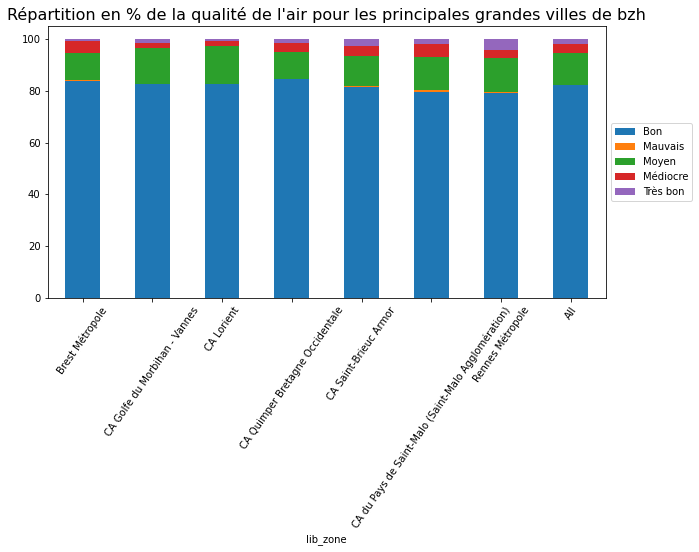

In [18]:
zone = []
valeur.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la qualité de l'air pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=55)

La qualité de l'air est relativement bonne dans les différentes grandes villes de Bretagne. Et la ville la plus "agréable" semble être Quimper avec une qualité d'air positive de 86.07%. (bon+trèsbon)

Text(0.5, 1.0, 'Qualité de lair dans les grandes villes de BZH')

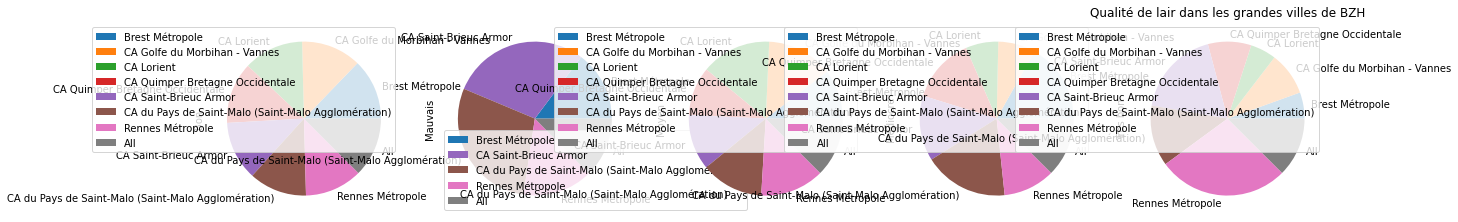

In [19]:
#zone = []
valeur.plot.pie(subplots=True, figsize=(20, 200))

plt.show

#plt.figure(figsize=(12,8))
plt.title('Qualité de lair dans les grandes villes de BZH')
#plt.xlabel("longueur_petal")
#plt.ylabel("largeur_petal")
#plt.scatter(x,y, c="green", lw=2, ls='--')

#plot = df3.plot.pie(subplots=True, figsize=(20, 8))

### B- 1er confinement : 17 mars 2020 - 11 mai 2020

In [20]:
valeur = pd.crosstab(df032020['lib_zone'],df032020['qualif'],normalize='index',margins=True).round(4)*100
valeur

qualif,Bon,Mauvais,Moyen,Médiocre
lib_zone,,,,
Brest Métropole,65.45,1.82,18.18,14.55
CA Golfe du Morbihan - Vannes,65.45,0.00,30.91,3.64
CA Lorient,65.45,0.00,30.91,3.64
CA Quimper Bretagne Occidentale,69.09,0.00,25.45,5.45
CA Saint-Brieuc Armor,61.11,3.70,24.07,11.11
CA du Pays de Saint-Malo (Saint-Malo Agglomération),62.96,3.70,24.07,9.26
Rennes Métropole,61.82,1.82,27.27,9.09
All,64.49,1.57,25.85,8.09


<ipython-input-21-7ab4ea074987>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

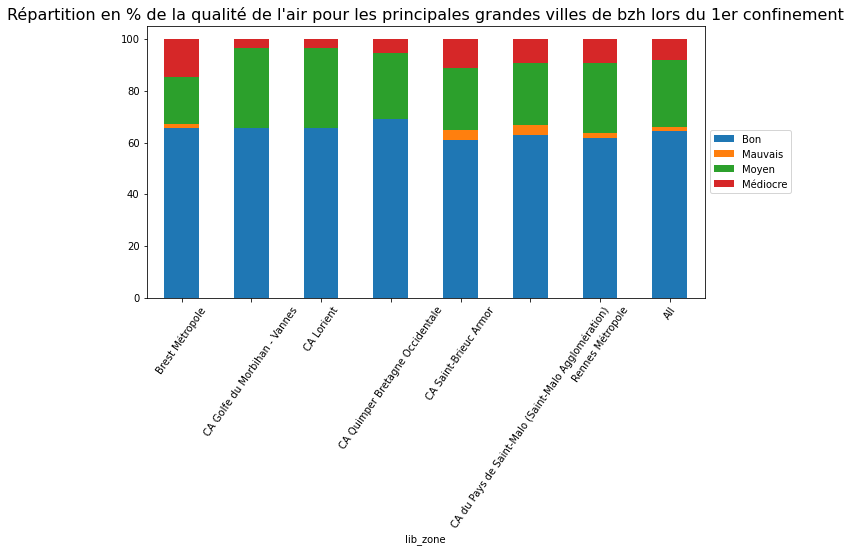

In [21]:
zone = []
valeur.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la qualité de l'air pour les principales grandes villes de bzh lors du 1er confinement"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=55)

### C- 2eme confinement : 30 octobre 2020 - 15 décembre 2020 

In [22]:
valeur = pd.crosstab(df102020['lib_zone'],df102020['qualif'],normalize='index',margins=True).round(4)*100
valeur

qualif,Bon,Moyen,Médiocre,Très bon
lib_zone,,,,
Brest Métropole,93.48,6.52,0.00,0.00
CA Golfe du Morbihan - Vannes,86.96,6.52,0.00,6.52
CA Lorient,93.48,4.35,0.00,2.17
CA Quimper Bretagne Occidentale,93.48,2.17,0.00,4.35
CA Saint-Brieuc Armor,86.96,4.35,0.00,8.70
CA du Pays de Saint-Malo (Saint-Malo Agglomération),86.96,4.35,2.17,6.52
Rennes Métropole,73.91,8.70,0.00,17.39
All,87.89,5.28,0.31,6.52


<ipython-input-23-e394686c827d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

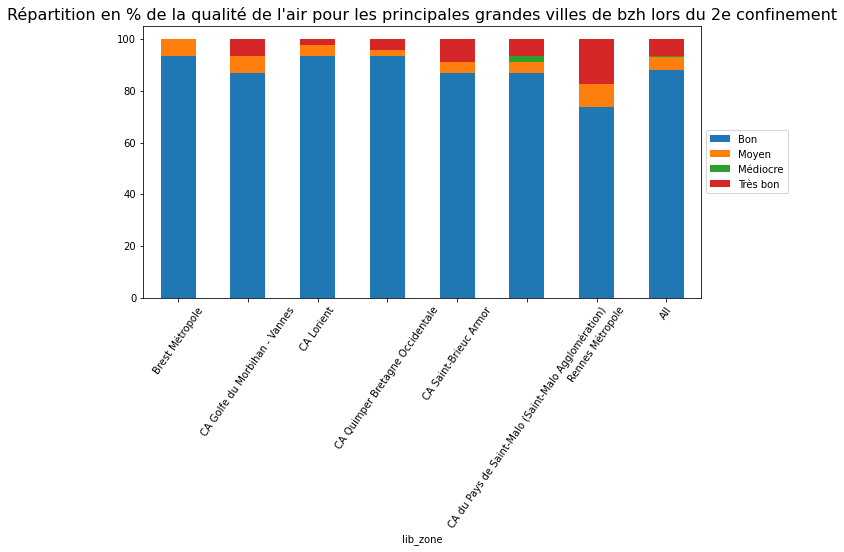

In [23]:
zone = []
valeur.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la qualité de l'air pour les principales grandes villes de bzh lors du 2e confinement"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=55)

A la lecture de ces 3 graphiques, nous pouvons affirmer que :

        -la qualité de l'air s'est nettement dégradée lors du 1er confinement vs l'année. Le % de Médiocre augmente considéremment durant cette période , notamment à Brest où les conditions météo ont été extrèment bonne durant cette période. on constate également un basculement de la classification bonne à moyen assez conséquent pour l'ensemble des métropoles (x2).
     
      -le 2eme confinement a eu moins d'incidence. La qualité de l'air s'est améliorée hormis sur Rennes 
      (confinement moins strict et plus court
      les gens utilisent leurs voiture contrairement au premier confinement où une bonne partie de l'économie a été impactée        du jour au lendemain ). 
      
      Le facteur de saisonalité en également à prendre en considération .
      
      - Brest et Quimper sont les villes bretonne ayant la meilleur qualité de l'air(vive le Finistère)

## 4- Fréquence O3 Ozone (compris entre 1 et 10 ou nul si absent) (en valeur et en %) par ville

### A - DONNEES GLOBALES

In [24]:
val_O3=pd.crosstab(data['lib_zone'],data['val_o3'],margins=True)
val_O3

val_o3,0,1,2,3,4,5,6,7,All
lib_zone,,,,,,,,,
Brest Métropole,2,0,8,161,155,30,5,0,361
CA Golfe du Morbihan - Vannes,2,0,17,174,130,37,5,0,365
CA Lorient,2,0,13,175,134,37,4,0,365
CA Quimper Bretagne Occidentale,2,0,12,173,141,30,8,0,366
CA Saint-Brieuc Armor,2,1,16,198,104,38,5,1,365
CA du Pays de Saint-Malo (Saint-Malo Agglomération),2,0,19,191,109,36,6,0,363
Rennes Métropole,2,3,33,179,102,37,6,0,362
All,14,4,118,1251,875,245,39,1,2547


In [25]:
val_O3b = pd.crosstab(data['lib_zone'],data['val_o3'],normalize='index',margins=True).round(4)*100
val_O3b

val_o3,0,1,2,3,4,5,6,7
lib_zone,,,,,,,,
Brest Métropole,0.55,0.00,2.22,44.60,42.94,8.31,1.39,0.00
CA Golfe du Morbihan - Vannes,0.55,0.00,4.66,47.67,35.62,10.14,1.37,0.00
CA Lorient,0.55,0.00,3.56,47.95,36.71,10.14,1.10,0.00
CA Quimper Bretagne Occidentale,0.55,0.00,3.28,47.27,38.52,8.20,2.19,0.00
CA Saint-Brieuc Armor,0.55,0.27,4.38,54.25,28.49,10.41,1.37,0.27
CA du Pays de Saint-Malo (Saint-Malo Agglomération),0.55,0.00,5.23,52.62,30.03,9.92,1.65,0.00
Rennes Métropole,0.55,0.83,9.12,49.45,28.18,10.22,1.66,0.00
All,0.55,0.16,4.63,49.12,34.35,9.62,1.53,0.04


<ipython-input-26-87a85daa95d2>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

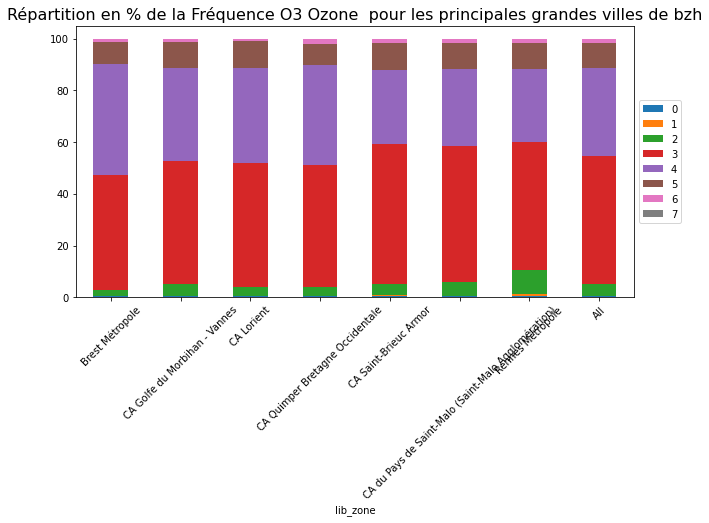

In [26]:
zone = []
val_O3b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la Fréquence O3 Ozone  pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

### B- 1er confinement : 17 mars 2020 - 11 mai 2020

In [27]:
val_O3b = pd.crosstab(df032020['lib_zone'],df032020['val_o3'],normalize='index',margins=True).round(4)*100
val_O3b

val_o3,3,4,5
lib_zone,,,
Brest Métropole,10.91,65.45,23.64
CA Golfe du Morbihan - Vannes,10.91,67.27,21.82
CA Lorient,10.91,69.09,20.00
CA Quimper Bretagne Occidentale,12.73,65.45,21.82
CA Saint-Brieuc Armor,16.67,57.41,25.93
CA du Pays de Saint-Malo (Saint-Malo Agglomération),16.67,64.81,18.52
Rennes Métropole,16.36,61.82,21.82
All,13.58,64.49,21.93


<ipython-input-28-dc686b6b6c0e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

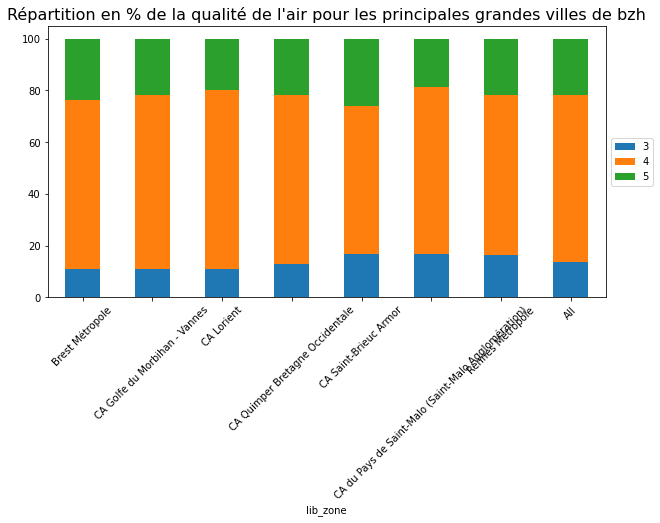

In [28]:
zone = []
val_O3b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la qualité de l'air pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

### C- 2eme confinement : 30 octobre 2020 - 15 décembre 2020 

In [29]:
val_O3b = pd.crosstab(df102020['lib_zone'],df102020['val_o3'],normalize='index',margins=True).round(4)*100
val_O3b

val_o3,0,1,2,3,4
lib_zone,,,,,
Brest Métropole,2.17,0.00,6.52,71.74,19.57
CA Golfe du Morbihan - Vannes,2.17,0.00,23.91,67.39,6.52
CA Lorient,2.17,0.00,17.39,65.22,15.22
CA Quimper Bretagne Occidentale,2.17,0.00,15.22,69.57,13.04
CA Saint-Brieuc Armor,2.17,2.17,17.39,78.26,0.00
CA du Pays de Saint-Malo (Saint-Malo Agglomération),2.17,0.00,26.09,71.74,0.00
Rennes Métropole,2.17,6.52,39.13,52.17,0.00
All,2.17,1.24,20.81,68.01,7.76


<ipython-input-30-87a85daa95d2>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

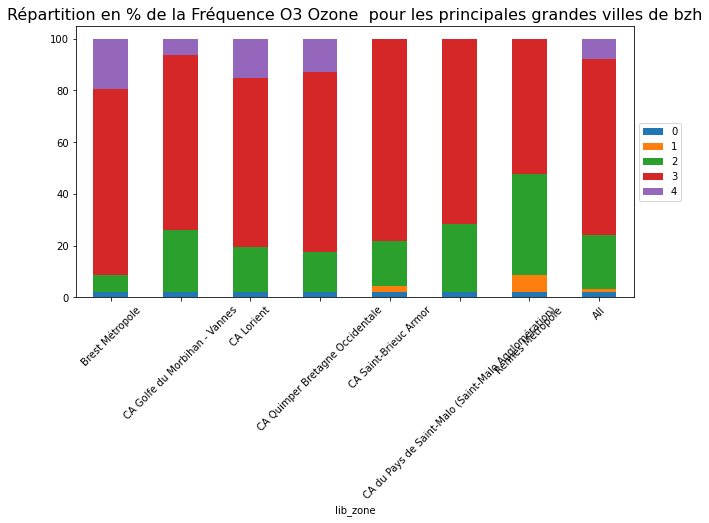

In [30]:
zone = []
val_O3b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la Fréquence O3 Ozone  pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

On constate que sur l'année les particules d'ozone sont 'réparties' à +/- 85% entre l'indice 3 et 4, et que tous les indices sont relevés même si c'est à faible valeur.

Lors du 1er confinement, les 2/3 des indices sont regroupés dans la valeur 4 (80 à 105) avec une tendance à évoluer vers l'indice 5 (aux alentours de 20%).

Lors du dernier confinement, c'est l'effet inverse qui se produit, les 2/3 des indices sont regroupés dans la valeur 3 avec une tendance à évoluer vers l'indice 2 (21%).

Plus l'indice est proche de 0, meilleur il est . 

Le taux est donc meilleur lors du 2e confinement que sur l'année et lors du premier confinement.

La température étant un facteur qui influence l'ozone , ceci peut expliquer cela. 

## 5- Fréquence val_pm10 =>PM10 Particules de diamètre inférieur à 10 μm (en valeur et en %) par ville

### A - DONNEES GLOBALES

In [31]:
val_pm10=pd.crosstab(data['lib_zone'],data['val_pm10'],margins=True)
val_pm10

val_pm10,0,1,2,3,4,5,6,7,8,All
lib_zone,,,,,,,,,,
Brest Métropole,2,12,142,112,63,17,8,4,1,361
CA Golfe du Morbihan - Vannes,2,23,174,102,41,20,1,2,0,365
CA Lorient,2,23,163,105,48,21,1,2,0,365
CA Quimper Bretagne Occidentale,2,20,169,113,43,13,4,2,0,366
CA Saint-Brieuc Armor,2,28,167,112,31,15,5,3,2,365
CA du Pays de Saint-Malo (Saint-Malo Agglomération),2,12,128,119,64,24,8,4,2,363
Rennes Métropole,2,11,167,113,43,20,4,1,1,362
All,14,129,1110,776,333,130,31,18,6,2547


In [32]:
val_pm10b = pd.crosstab(data['lib_zone'],data['val_pm10'],normalize='index',margins=True).round(4)*100
val_pm10b

val_pm10,0,1,2,3,4,5,6,7,8
lib_zone,,,,,,,,,
Brest Métropole,0.55,3.32,39.34,31.02,17.45,4.71,2.22,1.11,0.28
CA Golfe du Morbihan - Vannes,0.55,6.30,47.67,27.95,11.23,5.48,0.27,0.55,0.00
CA Lorient,0.55,6.30,44.66,28.77,13.15,5.75,0.27,0.55,0.00
CA Quimper Bretagne Occidentale,0.55,5.46,46.17,30.87,11.75,3.55,1.09,0.55,0.00
CA Saint-Brieuc Armor,0.55,7.67,45.75,30.68,8.49,4.11,1.37,0.82,0.55
CA du Pays de Saint-Malo (Saint-Malo Agglomération),0.55,3.31,35.26,32.78,17.63,6.61,2.20,1.10,0.55
Rennes Métropole,0.55,3.04,46.13,31.22,11.88,5.52,1.10,0.28,0.28
All,0.55,5.06,43.58,30.47,13.07,5.10,1.22,0.71,0.24


<ipython-input-33-c07210d53a4b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

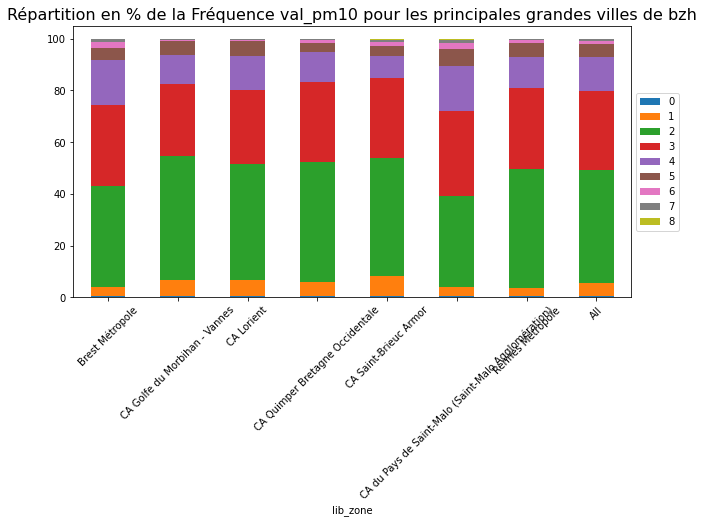

In [33]:
zone = []
val_pm10b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la Fréquence val_pm10 pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

### B- 1er confinement : 17 mars 2020 - 11 mai 2020

In [34]:
val_pm10b = pd.crosstab(df032020['lib_zone'],df032020['val_pm10'],normalize='index',margins=True).round(4)*100
val_pm10b

val_pm10,1,2,3,4,5,6,7,8
lib_zone,,,,,,,,
Brest Métropole,1.82,21.82,23.64,29.09,7.27,7.27,7.27,1.82
CA Golfe du Morbihan - Vannes,1.82,29.09,30.91,16.36,18.18,0.00,3.64,0.00
CA Lorient,1.82,25.45,27.27,25.45,16.36,0.00,3.64,0.00
CA Quimper Bretagne Occidentale,1.82,29.09,29.09,21.82,12.73,1.82,3.64,0.00
CA Saint-Brieuc Armor,0.00,25.93,25.93,20.37,12.96,5.56,5.56,3.70
CA du Pays de Saint-Malo (Saint-Malo Agglomération),0.00,22.22,20.37,25.93,18.52,1.85,7.41,3.70
Rennes Métropole,0.00,27.27,25.45,21.82,14.55,7.27,1.82,1.82
All,1.04,25.85,26.11,22.98,14.36,3.39,4.70,1.57


<ipython-input-35-c07210d53a4b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

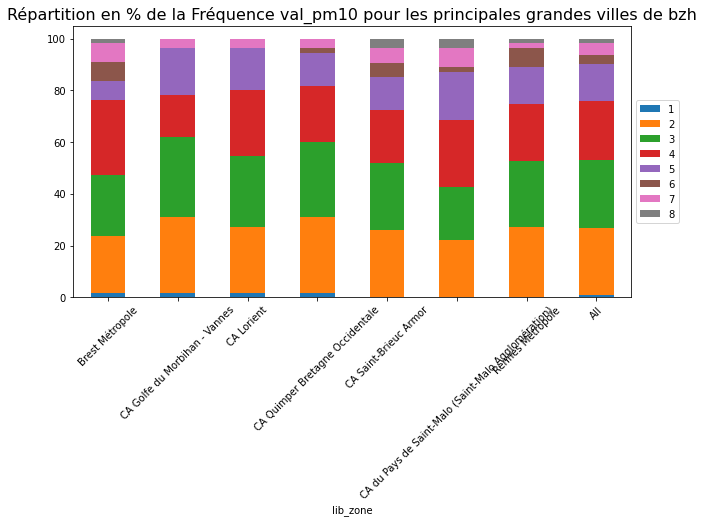

In [35]:
zone = []
val_pm10b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la Fréquence val_pm10 pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

### C- 2eme confinement : 30 octobre 2020 - 15 décembre 2020 

In [36]:
val_pm10b = pd.crosstab(df102020['lib_zone'],df102020['val_pm10'],normalize='index',margins=True).round(4)*100
val_pm10b

val_pm10,0,2,3,4,5,6
lib_zone,,,,,,
Brest Métropole,2.17,39.13,28.26,23.91,6.52,0.00
CA Golfe du Morbihan - Vannes,2.17,39.13,32.61,19.57,6.52,0.00
CA Lorient,2.17,39.13,36.96,17.39,4.35,0.00
CA Quimper Bretagne Occidentale,2.17,47.83,32.61,15.22,2.17,0.00
CA Saint-Brieuc Armor,2.17,36.96,45.65,10.87,4.35,0.00
CA du Pays de Saint-Malo (Saint-Malo Agglomération),2.17,23.91,43.48,23.91,4.35,2.17
Rennes Métropole,2.17,36.96,39.13,13.04,8.70,0.00
All,2.17,37.58,36.96,17.70,5.28,0.31


<ipython-input-37-c07210d53a4b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brest Métropole'),
  Text(1, 0, 'CA Golfe du Morbihan - Vannes'),
  Text(2, 0, 'CA Lorient'),
  Text(3, 0, 'CA Quimper Bretagne Occidentale'),
  Text(4, 0, 'CA Saint-Brieuc Armor'),
  Text(5, 0, 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'),
  Text(6, 0, 'Rennes Métropole'),
  Text(7, 0, 'All')])

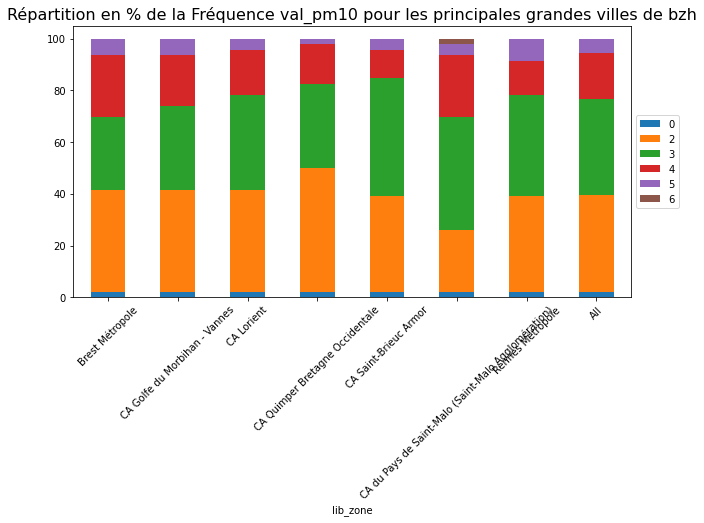

In [37]:
zone = []
val_pm10b.plot.bar(stacked=True,figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
myText = plt.title("Répartition en % de la Fréquence val_pm10 pour les principales grandes villes de bzh"); myText.set_fontsize(16)
plt.show
plt.xticks(rotation=45)

On constate que la tendance d'évolution des particules de 10µm/m suit la même tendance que la mesure de l'ozone.
Dégradation lors du premier confinement et amélioration lors du second.

## MESURE DE TENDANCE CENTRALE

(aurait du être placé avant la précédente partie)

In [38]:
data2 = data.drop(('code_zone'),axis=1)
data2

,date_ech,valeur,qualif,lib_zone,val_no2,val_o3,val_pm10,geom,couleur
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
...,...,...,...,...,...,...,...,...,...
2542,2020-01-01,3,Bon,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600
2543,2020-01-01,3,Bon,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600
2544,2020-01-01,3,Bon,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600
2545,2020-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600


In [39]:
data2.describe()


,valeur,val_no2,val_o3,val_pm10
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,3.721633,1.257951,3.517472,2.755791
std,0.887116,0.526414,0.840821,1.115854
min,2.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,3.000000,2.000000
50%,4.000000,1.000000,3.000000,3.000000
75%,4.000000,1.000000,4.000000,3.000000
max,8.000000,4.000000,7.000000,8.000000


La moyenne des différentes valeur nous permet de dire que 

    - l'air est plutôt "bon" en Bretagne avec une moyenne de 3.72 et un faible taux de particules.
    
    - une médiane 5(50%) qui estde 4 pour la qualité de l'air(autant d'observations (en nombre) dans notre base de données qui sont supérieures ou inférieures à 4, normal car l'ensemble des valeurs tourne autour de 3 et 4 )
    

### ANALYSE DE LA VARIANCE

In [40]:
np.var(data2)
#data.drop(code_zone)

valeur      0.786666
val_no2     0.277003
val_o3      0.706703
val_pm10    1.244642
dtype: float64

La variance est la moyenne des carrés des écarts à la moyenne, ou encore la moyenne des carrés diminuée du carré de la moyenne. Plus une variance est élévée plus la dispersion des observations est importante ; elle est très sensible aux valeurs extrêmes.
On constate que la variance est assez proche de 0  ce qui indique que les données sont peu dispersées. 


# GRAPHIQUE MENSUEL DES DIFFERENTES ANALYSES

In [41]:

data['date']=pd.to_datetime(data["date_ech"])

data['année'] = pd.DatetimeIndex(data['date']).year
data['mois'] = pd.DatetimeIndex(data['date']).month
data['jour'] = pd.DatetimeIndex(data['date']).day
data=data.drop('date_ech',axis=1)


In [42]:
data

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
0,3,Bon,200069409,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01,2021,1,1
1,3,Bon,200067932,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01,2021,1,1
2,3,Bon,200068120,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01,2021,1,1
3,3,Bon,243500139,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01,2021,1,1
4,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,3,Bon,200069409,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600,2020-01-01,2020,1,1
2543,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-01-01,2020,1,1
2544,3,Bon,200042174,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-01-01,2020,1,1
2545,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600,2020-01-01,2020,1,1


In [43]:
#selection des données concernant 2020, 2021 n'étant pas significative pour ce que nous souhaitons
df=data[data.année==2020]
df


,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
7,3,Bon,242900314,Brest Métropole,3,3,2,POINT (147878.22420658765 6837175.794037035),#99E600,2020-12-31,2020,12,31
8,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,3,2,POINT (338719.75810268405 6844013.788199687),#99E600,2020-12-31,2020,12,31
9,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-12-31,2020,12,31
10,3,Bon,200042174,CA Lorient,3,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-12-31,2020,12,31
11,3,Bon,200069409,CA Saint-Brieuc Armor,2,3,2,POINT (269153.2682993477 6832824.934141148),#99E600,2020-12-31,2020,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,3,Bon,200069409,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600,2020-01-01,2020,1,1
2543,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-01-01,2020,1,1
2544,3,Bon,200042174,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-01-01,2020,1,1
2545,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600,2020-01-01,2020,1,1


### A - vue globale pour la région Bretagne

In [44]:
#moyenne des indices pour 2020
df1=df.groupby(['mois']).mean().round(2)
print(df1)

      valeur     code_zone  val_no2  val_o3  val_pm10   année   jour
mois                                                                
1       3.55  2.183666e+08     1.59    3.18      3.06  2020.0  15.93
2       3.74  2.178682e+08     1.32    3.51      3.09  2020.0  14.86
3       4.21  2.184465e+08     1.30    3.78      3.54  2020.0  16.04
4       4.56  2.184735e+08     1.12    4.33      3.66  2020.0  15.52
5       4.31  2.185927e+08     1.05    4.28      2.49  2020.0  16.00
6       3.85  2.185927e+08     1.10    3.84      2.31  2020.0  15.50
7       3.44  2.185927e+08     1.06    3.43      2.16  2020.0  16.00
8       3.68  2.185927e+08     1.08    3.57      2.43  2020.0  16.00
9       3.78  2.185927e+08     1.38    3.71      2.62  2020.0  15.50
10      3.11  2.185927e+08     1.26    3.04      2.45  2020.0  16.00
11      3.43  2.185927e+08     1.44    2.82      3.19  2020.0  15.50
12      3.06  2.185927e+08     1.44    2.86      2.26  2020.0  16.00


In [45]:
#Suppression de la colonne jour
df1 = df1.drop(['jour','année','code_zone'],axis=1)
df1

,valeur,val_no2,val_o3,val_pm10
mois,,,,
1,3.55,1.59,3.18,3.06
2,3.74,1.32,3.51,3.09
3,4.21,1.30,3.78,3.54
4,4.56,1.12,4.33,3.66
5,4.31,1.05,4.28,2.49
6,3.85,1.10,3.84,2.31
7,3.44,1.06,3.43,2.16
8,3.68,1.08,3.57,2.43
9,3.78,1.38,3.71,2.62


In [46]:
mois = []
for i in range (1,13):
    mois.append(i)
print(mois)

#mois = [i for i in range(1,13)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


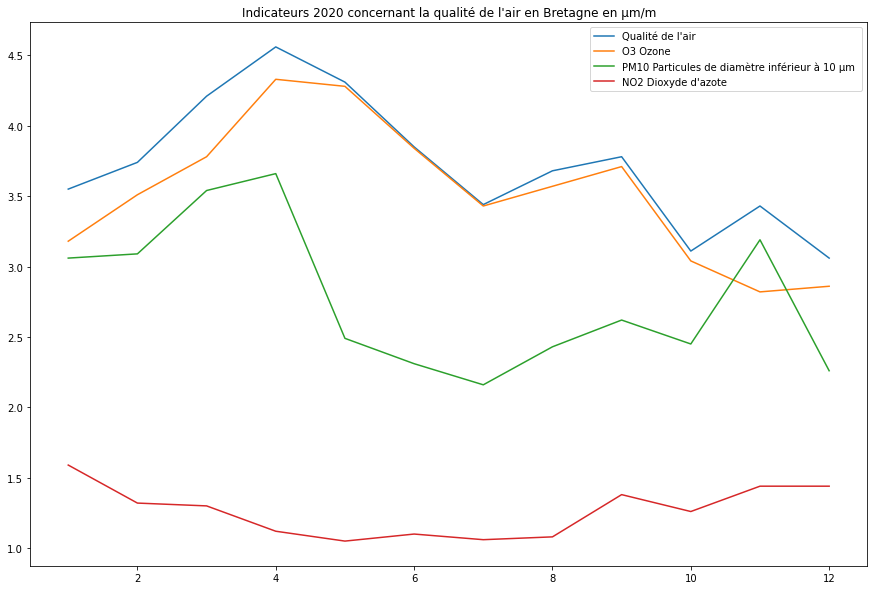

In [47]:
plt.figure(figsize=(15,10))
plt.title("Indicateurs 2020 concernant la qualité de l'air en Bretagne en µm/m")
plt.plot(mois,df1['valeur'],label="Qualité de l'air")
plt.plot(mois,df1['val_o3'],label='O3 Ozone')
plt.plot(mois,df1['val_pm10'],label='PM10 Particules de diamètre inférieur à 10 μm ')
plt.plot(mois,df1['val_no2'],label="NO2 Dioxyde d'azote")
plt.legend()
plt.show()



Avec ce graphique qui représente la moyenne des différents indicateurs pour les7 grandes métropoles de Bretagne, on remarque 
que les taux des 2 périodes de confinements sont globalement plus élevés que les autres mois de l'année alors que nous aurions pu nous attendre à un effet inverse.
difficile de savoir si cela est directement lié aux effets du confinement comme nous ne comparons pas les données avec celles des années précédentes à la même période, mais tout laisse à présager que les confinements ont eu 1 impact direct négatif sur la qualité de l'air .
Pour rappel dates du confinement,

17 mars 2020 - 11 mai 2020

30 oct. 2020 – 15 déc. 2020

On constate également que durant les 2 confinements, les courbes suivent la même évolution (à des échelles différentes) => 2 pics
Causes possibles : les émissions du secteur résidentiel sont importantes  (particules issues de l’utilisation du bois pour le chauffage) et les conditions météorologiques de cette période (printemps).

A la vue des différentes courbes, on constate que la qualité de l'air ,l'ozone et le sparticules suivent la même tendance et  sont correlées tout au long de l'année et des saisons.

On constate également que durant l'été nous avons une dégradation de la qualité de l'air

Le taux du dioxyde d'azote (du à la combustion) reste relativement plus faible que les autres indicateurs et

### B- vue globale ville par ville

In [48]:
df

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
7,3,Bon,242900314,Brest Métropole,3,3,2,POINT (147878.22420658765 6837175.794037035),#99E600,2020-12-31,2020,12,31
8,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,3,2,POINT (338719.75810268405 6844013.788199687),#99E600,2020-12-31,2020,12,31
9,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-12-31,2020,12,31
10,3,Bon,200042174,CA Lorient,3,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-12-31,2020,12,31
11,3,Bon,200069409,CA Saint-Brieuc Armor,2,3,2,POINT (269153.2682993477 6832824.934141148),#99E600,2020-12-31,2020,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,3,Bon,200069409,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600,2020-01-01,2020,1,1
2543,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-01-01,2020,1,1
2544,3,Bon,200042174,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-01-01,2020,1,1
2545,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600,2020-01-01,2020,1,1


In [49]:
zones = []
for i in df["lib_zone"]:
    if i not in zones:
        zones.append(i)
zones

['Brest Métropole',
 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)',
 'CA Quimper Bretagne Occidentale',
 'CA Lorient',
 'CA Saint-Brieuc Armor',
 'CA Golfe du Morbihan - Vannes',
 'Rennes Métropole']

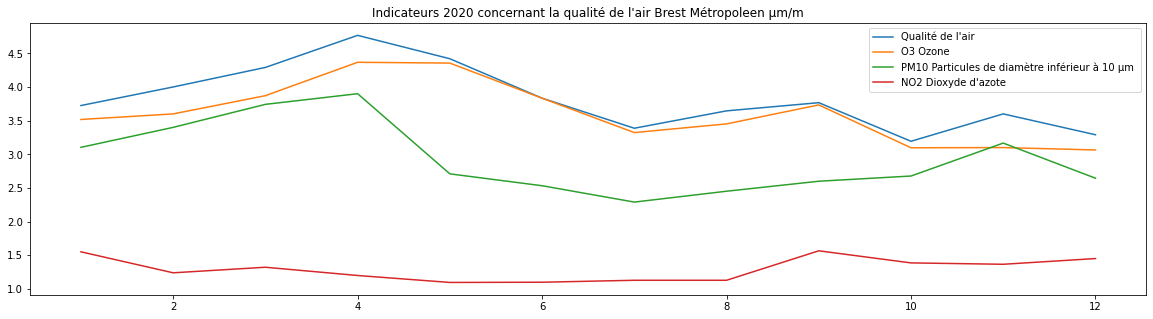

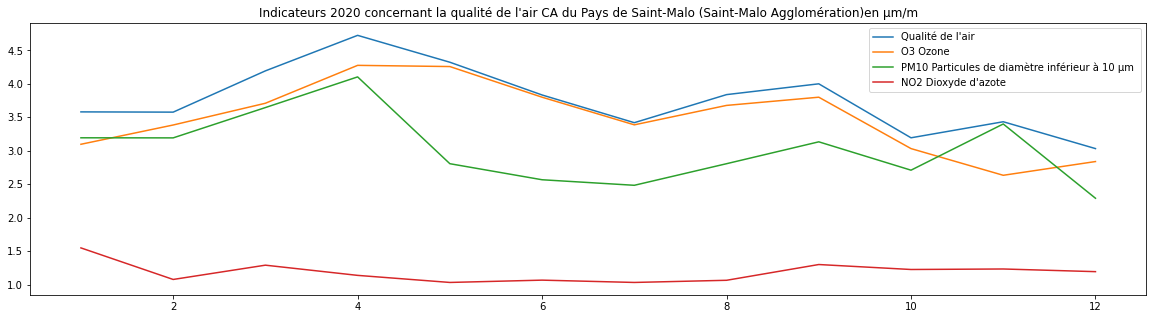

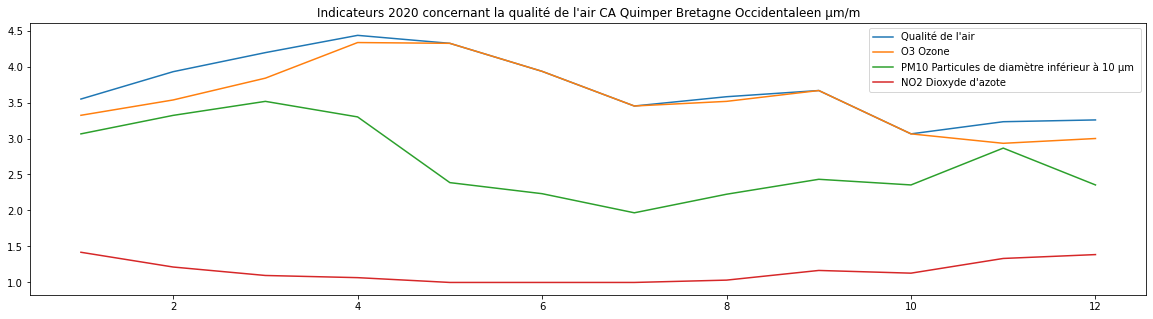

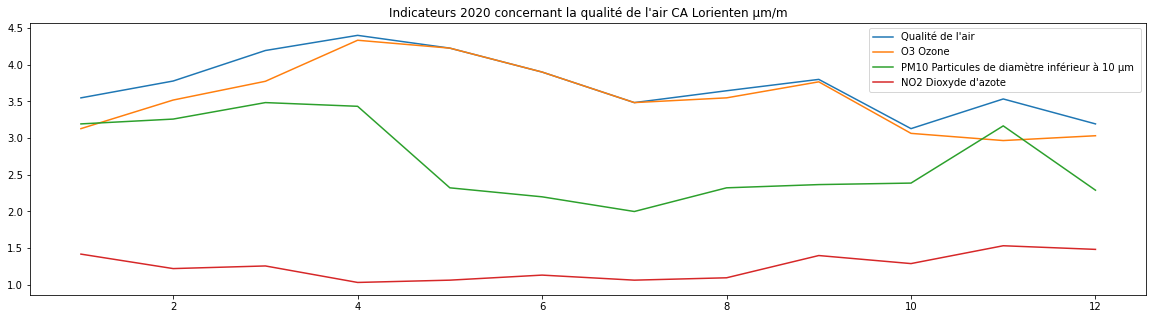

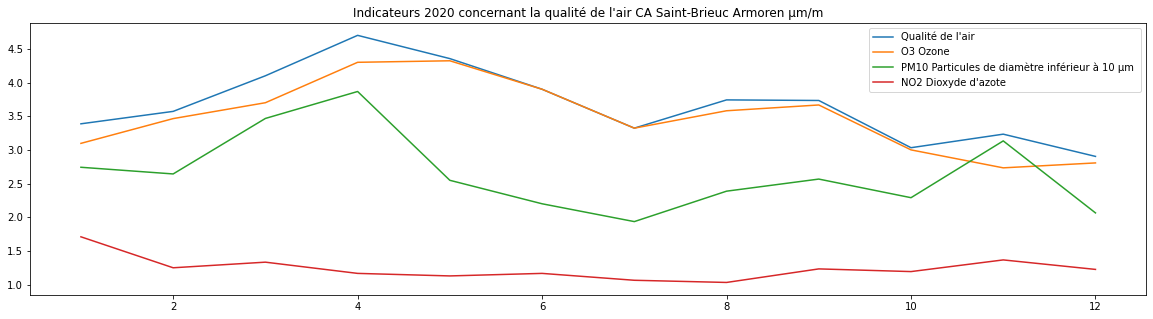

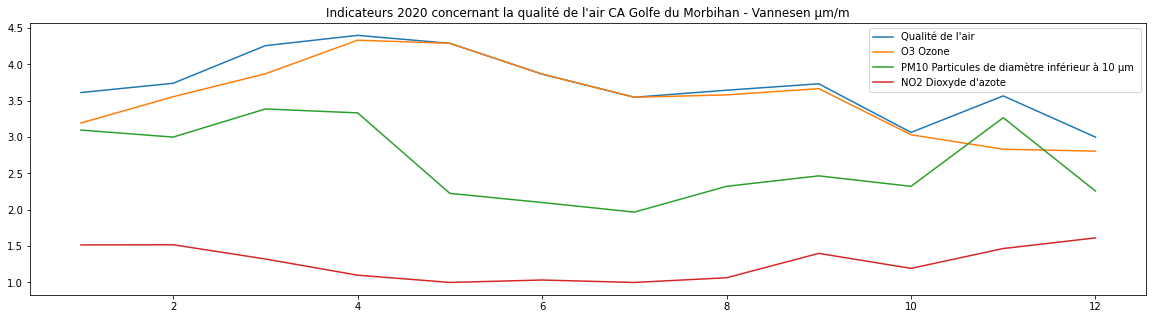

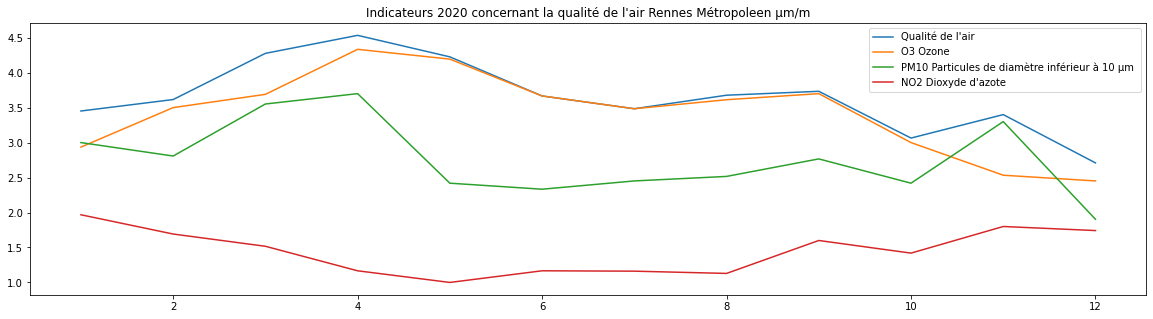

In [50]:
for zone in zones:
    df2=df[df.lib_zone==zone]
    df3=df2.groupby(['mois']).mean()
    df3 = df3.drop(['jour','année','code_zone'],axis=1)
    plt.figure(figsize=(20,5))
    plt.title("Indicateurs 2020 concernant la qualité de l'air " + zone + "en µm/m")
    plt.plot(mois,df3['valeur'],label="Qualité de l'air")
    plt.plot(mois,df3['val_o3'],label='O3 Ozone')
    plt.plot(mois,df3['val_pm10'],label='PM10 Particules de diamètre inférieur à 10 μm ')
    plt.plot(mois,df3['val_no2'],label="NO2 Dioxyde d'azote")
    plt.legend()
    plt.show()


La tendance est globalement la même dans chacune des villes.

### C- Analyse des données "valeur" >8

In [63]:
#selection des données concernant 2020, 2021 n'étant pas significative pour ce que nous souhaitons
dfvaleur=df[df.valeur>7]
dfvaleur

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
1953,8,Mauvais,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,5,8,POINT (338719.75810268405 6844013.788199687),#FF0000,2020-03-28,2020,3,28
1954,8,Mauvais,243500139,Rennes Métropole,1,4,8,POINT (349555.0070453745 6789093.386528317),#FF0000,2020-03-28,2020,3,28
1956,8,Mauvais,200069409,CA Saint-Brieuc Armor,1,5,8,POINT (269153.2682993477 6832824.934141148),#FF0000,2020-03-28,2020,3,28
1959,8,Mauvais,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,8,POINT (338719.75810268405 6844013.788199687),#FF0000,2020-03-27,2020,3,27
1960,8,Mauvais,200069409,CA Saint-Brieuc Armor,2,4,8,POINT (269153.2682993477 6832824.934141148),#FF0000,2020-03-27,2020,3,27
1965,8,Mauvais,242900314,Brest Métropole,1,5,8,POINT (147878.22420658765 6837175.794037035),#FF0000,2020-03-27,2020,3,27


Les plus "mauvaises" journées en terme de qualité d'air sur 2020 sont les 27 et 28 mars, soit 10 jours après le début du confinement. On remarque que les tx de particules est également élevé ces jours là (8)

# PREPARATION POUR CARTOGRAPHIE

In [57]:
data.head()

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
0,3,Bon,200069409,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01,2021,1,1
1,3,Bon,200067932,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01,2021,1,1
2,3,Bon,200068120,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01,2021,1,1
3,3,Bon,243500139,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01,2021,1,1
4,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01,2021,1,1


Nos coordonnées géographiques sont en projection Lambert 93 (EPSG : 2154), il faut donc les transformer en longitude et latitude

In [58]:


data["latitude"] = 0
data["longitude"] = 0

data["latitude"][data["lib_zone"] == 'Brest Métropole'] = 48.390394
data["longitude"][data["lib_zone"] == 'Brest Métropole'] = -4.470500

data["latitude"][data["lib_zone"] == 'CA Golfe du Morbihan - Vannes'] = 47.658236
data["longitude"][data["lib_zone"] == 'CA Golfe du Morbihan - Vannes'] = -2.730847

data["latitude"][data["lib_zone"] == 'CA Lorient'] = 47.7482524
data["longitude"][data["lib_zone"] == 'CA Lorient'] = -3.2902449

data["latitude"][data["lib_zone"] == 'CA Quimper Bretagne Occidentale'] = 47.997542
data["longitude"][data["lib_zone"] == 'CA Quimper Bretagne Occidentale'] = -4.087899

data["latitude"][data["lib_zone"] == 'CA Saint-Brieuc Armor'] = 48.51418
data["longitude"][data["lib_zone"] == 'CA Saint-Brieuc Armor'] = -2.735835

data["latitude"][data["lib_zone"] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'] = 48.649337
data["longitude"][data["lib_zone"] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'] = -1.905674

data["latitude"][data["lib_zone"] == 'Rennes Métropole'] = 48.117266
data["longitude"][data["lib_zone"] == 'Rennes Métropole'] = -1.7177926

<ipython-input-58-4cc256b4e938>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"][data["lib_zone"] == 'Brest Métropole'] = 48.390394
<ipython-input-58-4cc256b4e938>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["longitude"][data["lib_zone"] == 'Brest Métropole'] = -4.470500
<ipython-input-58-4cc256b4e938>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"][data["lib_zone"] == 'CA Golfe du Morbihan 

In [59]:
data

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour,latitude,longitude
0,3,Bon,200069409,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01,2021,1,1,48.514180,-2.735835
1,3,Bon,200067932,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01,2021,1,1,47.658236,-2.730847
2,3,Bon,200068120,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01,2021,1,1,47.997542,-4.087899
3,3,Bon,243500139,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01,2021,1,1,48.117266,-1.717793
4,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01,2021,1,1,48.649337,-1.905674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,3,Bon,200069409,CA Saint-Brieuc Armor,2,2,3,POINT (269153.2682993477 6832824.934141148),#99E600,2020-01-01,2020,1,1,48.514180,-2.735835
2543,3,Bon,200068120,CA Quimper Bretagne Occidentale,2,3,2,POINT (172753.63056731108 6795400.543816281),#99E600,2020-01-01,2020,1,1,47.997542,-4.087899
2544,3,Bon,200042174,CA Lorient,2,3,2,POINT (229772.04043578357 6768639.926683848),#99E600,2020-01-01,2020,1,1,47.748252,-3.290245
2545,3,Bon,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,2,3,POINT (338719.75810268405 6844013.788199687),#99E600,2020-01-01,2020,1,1,48.649337,-1.905674


In [60]:
data = data.drop(['jour','mois','année','code_zone'],axis=1)


In [61]:
data.groupby('lib_zone').mean()

,valeur,val_no2,val_o3,val_pm10,latitude,longitude
lib_zone,,,,,,
Brest Métropole,3.819945,1.290859,3.598338,2.916898,48.390394,-4.470500
CA Golfe du Morbihan - Vannes,3.723288,1.263014,3.536986,2.632877,47.658236,-2.730847
CA Lorient,3.731507,1.246575,3.550685,2.687671,47.748252,-3.290245
CA Quimper Bretagne Occidentale,3.713115,1.150273,3.565574,2.655738,47.997542,-4.087899
CA Saint-Brieuc Armor,3.660274,1.235616,3.479452,2.641096,48.514180,-2.735835
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,1.181818,3.479339,3.011019,48.649337,-1.905674
Rennes Métropole,3.646409,1.439227,3.411602,2.748619,48.117266,-1.717793


Text(0.5, 0, 'Longitude')

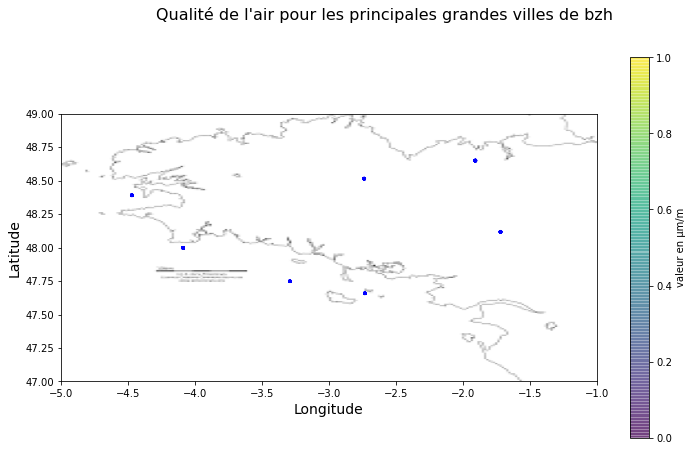

In [62]:
plt.figure(figsize=(12,7))
bzh_img=mpimg.imread('bzh.png')

plt.imshow(bzh_img,zorder=0,extent=[-5,-1,47,49.])
plt.suptitle("Qualité de l'air pour les principales grandes villes de bzh", fontsize=16)

plt.scatter(data['longitude'],data['latitude'],alpha=0.5,s=data['valeur'],c="blue", cmap = plt.get_cmap('jet'))
plt.colorbar(label="valeur en µm/m")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)



# CONCLUSION

Les périodes de confinement montrent une dégradation de la qualité de l'air , ce qui est surprenant par rapport à ce que nous pourrions penser. 

Un 3e pic , plutôt estival et se positionnant entre les 2 pics des confinements, est mis en avant lors de notre étude . 

Au vu des recherches effectuées, même si cela parait tentant de dire qu'il y a une corrélation entre confinement et dégradation de la qualité de l'air en Bretagne, notre conclusion doit être nuancée, car nous ne disposons pas de suffisament d'éléments pour faire le racourci, notamment la comparaison des données avec celles de n-1, n-2 et les effets de saisonnalité par exemple.
(exemple :en hiver, les émissions du secteur résidentiel (particules issues de l’utilisation du bois pour le chauffage) sont importantes)





C- Analyse des données "valeur" >5

In [64]:
#selection des données concernant 2020, 2021 n'étant pas significative pour ce que nous souhaitons
dfvaleur=df[df.valeur>7]
dfvaleur

,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
1953,8,Mauvais,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,5,8,POINT (338719.75810268405 6844013.788199687),#FF0000,2020-03-28,2020,3,28
1954,8,Mauvais,243500139,Rennes Métropole,1,4,8,POINT (349555.0070453745 6789093.386528317),#FF0000,2020-03-28,2020,3,28
1956,8,Mauvais,200069409,CA Saint-Brieuc Armor,1,5,8,POINT (269153.2682993477 6832824.934141148),#FF0000,2020-03-28,2020,3,28
1959,8,Mauvais,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,8,POINT (338719.75810268405 6844013.788199687),#FF0000,2020-03-27,2020,3,27
1960,8,Mauvais,200069409,CA Saint-Brieuc Armor,2,4,8,POINT (269153.2682993477 6832824.934141148),#FF0000,2020-03-27,2020,3,27
1965,8,Mauvais,242900314,Brest Métropole,1,5,8,POINT (147878.22420658765 6837175.794037035),#FF0000,2020-03-27,2020,3,27


Les plus "mauvaises" journées en terme de qualité d'air sur 2020 sont les 27 et 28 mars, soit 10 jours après le début du confinement. On remarque que les tx de particules est également élevé ces jours là (8)

In [66]:
#selection des données concernant 2020, 2021 n'étant pas significative pour ce que nous souhaitons
dfvaleur=df[df.valeur>5]
dfvaleur


,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour
258,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,2,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-11-26,2020,11,26
714,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-09-21,2020,9,21
721,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-09-20,2020,9,20
996,6,Médiocre,200069409,CA Saint-Brieuc Armor,1,4,6,POINT (269153.2682993477 6832824.934141148),#FFD100,2020-08-12,2020,8,12
1000,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-08-12,2020,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,6,Médiocre,200042174,CA Lorient,1,3,6,POINT (229772.04043578357 6768639.926683848),#FFD100,2020-01-25,2020,1,25
2377,6,Médiocre,200067932,CA Golfe du Morbihan - Vannes,1,3,6,POINT (269961.1106939723 6746307.8992528645),#FFD100,2020-01-25,2020,1,25
2379,6,Médiocre,200068120,CA Quimper Bretagne Occidentale,1,3,6,POINT (172753.63056731108 6795400.543816281),#FFD100,2020-01-25,2020,1,25
2385,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,2,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-01-24,2020,1,24


In [67]:
dfvaleur["period"] = dfvaleur["mois"].astype(str) + dfvaleur["jour"].astype(str)
dfvaleur["period"]=dfvaleur["mois"].map(str) +"/" + dfvaleur["jour"].map(str)
#dfvaleur['period'] = dfvaleur[['mois', 'jour']].agg('-'.join, axis=1)
dfvaleur

<ipython-input-67-d600717b603c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvaleur["period"] = dfvaleur["mois"].astype(str) + dfvaleur["jour"].astype(str)
<ipython-input-67-d600717b603c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvaleur["period"]=dfvaleur["mois"].map(str) +"/" + dfvaleur["jour"].map(str)


,valeur,qualif,code_zone,lib_zone,val_no2,val_o3,val_pm10,geom,couleur,date,année,mois,jour,period
258,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,2,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-11-26,2020,11,26,11/26
714,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-09-21,2020,9,21,9/21
721,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-09-20,2020,9,20,9/20
996,6,Médiocre,200069409,CA Saint-Brieuc Armor,1,4,6,POINT (269153.2682993477 6832824.934141148),#FFD100,2020-08-12,2020,8,12,8/12
1000,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,4,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-08-12,2020,8,12,8/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,6,Médiocre,200042174,CA Lorient,1,3,6,POINT (229772.04043578357 6768639.926683848),#FFD100,2020-01-25,2020,1,25,1/25
2377,6,Médiocre,200067932,CA Golfe du Morbihan - Vannes,1,3,6,POINT (269961.1106939723 6746307.8992528645),#FFD100,2020-01-25,2020,1,25,1/25
2379,6,Médiocre,200068120,CA Quimper Bretagne Occidentale,1,3,6,POINT (172753.63056731108 6795400.543816281),#FFD100,2020-01-25,2020,1,25,1/25
2385,6,Médiocre,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,2,6,POINT (338719.75810268405 6844013.788199687),#FFD100,2020-01-24,2020,1,24,1/24


In [68]:
#fréquences selon la zone et la qualité de l'air
pd.crosstab(dfvaleur['period'],dfvaleur['qualif'],margins=True)

qualif,Mauvais,Médiocre,All
period,,,
1/23,0,1,1
1/24,0,1,1
1/25,0,4,4
11/26,0,1,1
2/10,0,1,1
2/13,0,2,2
2/14,0,1,1
3/19,0,1,1
3/20,0,1,1
